In [2]:
import requests
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
# Function to read data from local .txt files
def read_txt_files(file_paths):
    data = ""
    
    # Combine data from all provided file paths
    for file_path in file_paths:
        try:
            with open(file_path, 'r', encoding='utf-8') as file:
                data += file.read()
                data += "\n"  # Separate data from different files
        except FileNotFoundError:
            print(f"Error: File '{file_path}' not found.")
        except Exception as e:
            print(f"Error reading file '{file_path}': {e}")
    
    # Parse the combined data
    data_list = data.strip().split("\n")
    data_json = {
        "target": [],
        "question": []
    }
    for d in data_list:
        try:
            if len(d) > 0:
                index = d.index(':')  # Find the position of the colon
                label, question = d[:index], d[index + 1:]
                data_json["target"].append(label.strip())
                data_json["question"].append(question.strip())
        except Exception as e:
            print(f"Error processing line: {d}, Error: {e}")
    
    return data_json

# List of .txt file paths
file_paths = [
    "C:/Users/ghada/DL/data/train_1000.txt",
    "C:/Users/ghada/DL/data/train_2000.txt",
    "C:/Users/ghada/DL/data/train_3000.txt",
    "C:/Users/ghada/DL/data/train_4000.txt",
    "C:/Users/ghada/DL/data/train_5500.txt"
]

# Load and process the data
data_json = read_txt_files(file_paths)
train_data = pd.DataFrame(data_json)


In [4]:
# Load and process the data
data_json = read_txt_files(file_paths)
train_data = pd.DataFrame(data_json)

In [6]:

# Save the DataFrame to a CSV file
csv_filename = "C:/Users/ghada/DL/data/train_data_from_txt.csv"
train_data.to_csv(csv_filename, index=False)
print(f"Data saved to {csv_filename}")

Data saved to C:/Users/ghada/DL/data/train_data_from_txt.csv


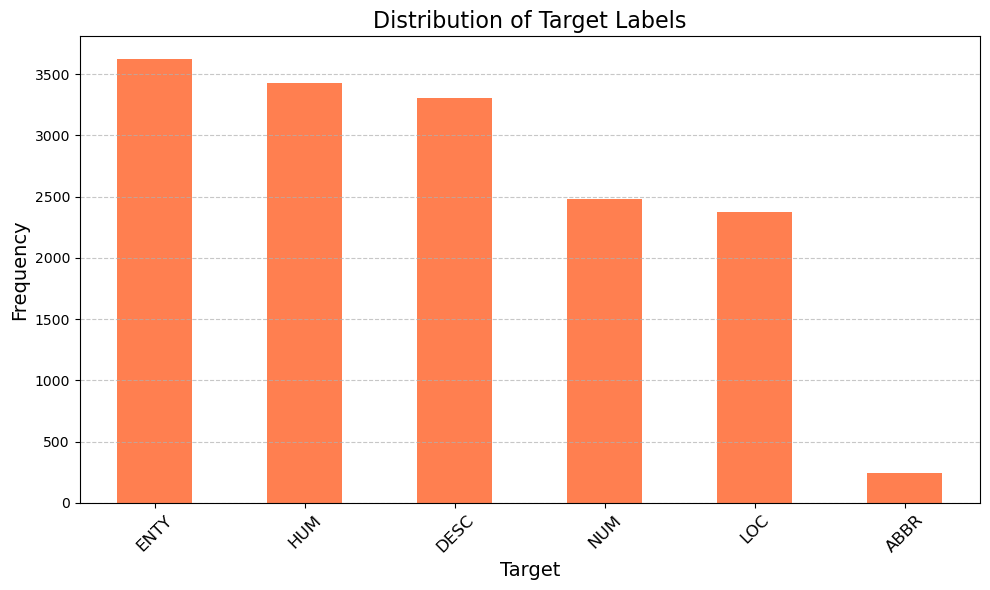

In [7]:
plt.figure(figsize=(10, 6))
train_data["target"].value_counts().plot(kind="bar", color='coral')
plt.title("Distribution of Target Labels", fontsize=16)
plt.xlabel("Target", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

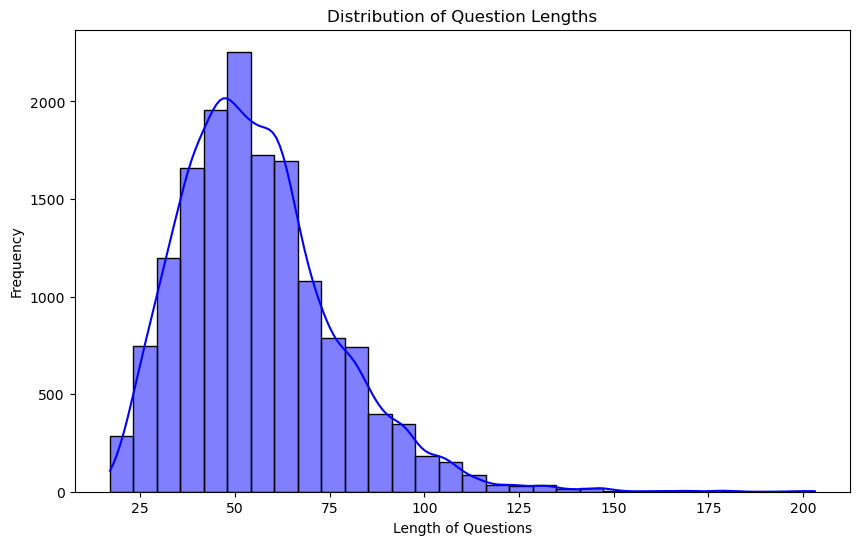

In [8]:
import seaborn as sns
# Visualization 2: Length of Questions
train_data['question_length'] = train_data['question'].str.len()

plt.figure(figsize=(10, 6))
sns.histplot(train_data['question_length'], bins=30, kde=True, color="blue")
plt.title("Distribution of Question Lengths")
plt.xlabel("Length of Questions")
plt.ylabel("Frequency")
plt.show()

In [9]:
pip install  wordcloud

Note: you may need to restart the kernel to use updated packages.


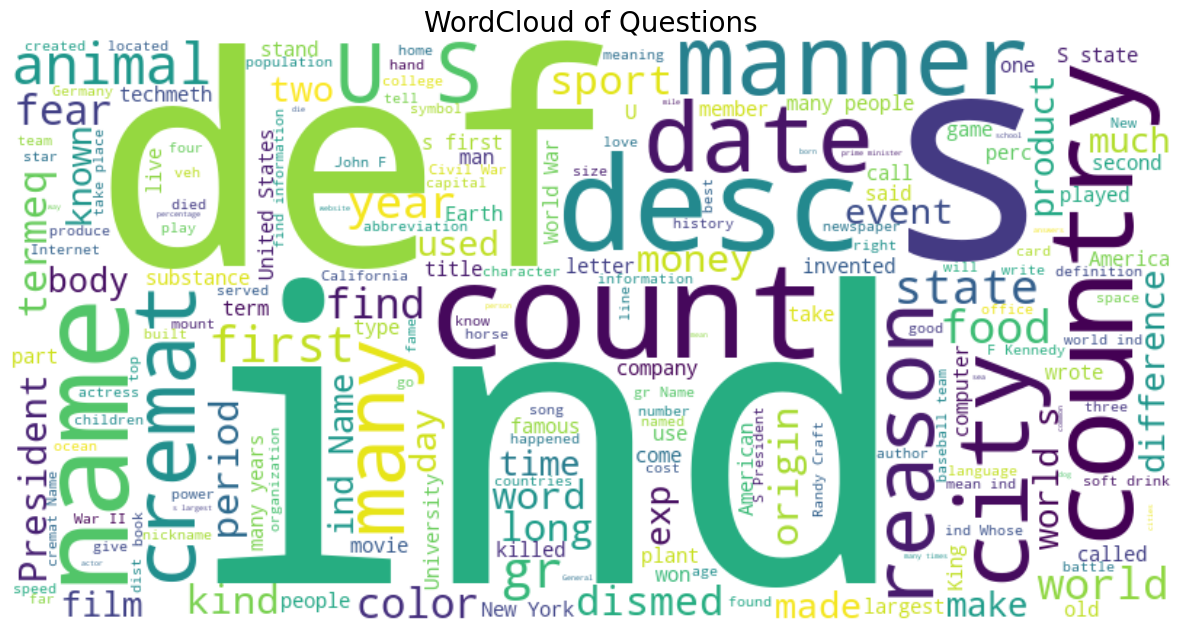

In [10]:
# Visualization 3: Top Words in Questions
from collections import Counter
from wordcloud import WordCloud
# Generate word frequency
all_words = " ".join(train_data['question'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_words)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Questions", fontsize=20)
plt.show()

In [11]:
train_data

,target,question,question_length
0,DESC,manner How did serfdom develop in and then lea...,57
1,ENTY,cremat What films featured the character Popey...,55
2,DESC,manner How can I find a list of celebrities ' ...,58
3,ENTY,animal What fowl grabs the spotlight after the...,75
4,ABBR,exp What is the full form of .com ?,35
...,...,...,...
15447,ENTY,other What 's the shape of a camel 's spine ?,45
15448,ENTY,currency What type of currency is used in China ?,49
15449,NUM,temp What is the temperature today ?,36
15450,NUM,temp What is the temperature for cooking ?,42


In [13]:
# Creating feature contains_currency_symbol
def currency(x):
  currency_symbols = ['€', '$', '¥', '£', '₹']
  for i in currency_symbols:
    if i in x:
      return 1
  return 0

train_data['contains_currency_symbol'] = train_data['question'].apply(currency)

In [14]:
train_data.head()

,target,question,question_length,contains_currency_symbol
0,DESC,manner How did serfdom develop in and then lea...,57,0
1,ENTY,cremat What films featured the character Popey...,55,0
2,DESC,manner How can I find a list of celebrities ' ...,58,0
3,ENTY,animal What fowl grabs the spotlight after the...,75,0
4,ABBR,exp What is the full form of .com ?,35,0


In [20]:
# Creating feature contains_number
def numbers(x):
  for i in x:
    if ord(i)>=48 and ord(i)<=57:
      return 1
  return 0

train_data['contains_number'] = train_data['question'].apply(numbers)

In [21]:
train_data.head()

,target,question,question_length,contains_currency_symbol,contains_number
0,DESC,manner How did serfdom develop in and then lea...,57,0,0
1,ENTY,cremat What films featured the character Popey...,55,0,0
2,DESC,manner How can I find a list of celebrities ' ...,58,0,0
3,ENTY,animal What fowl grabs the spotlight after the...,75,0,0
4,ABBR,exp What is the full form of .com ?,35,0,0


In [22]:
#data cleaning 
import re

# Define text-cleaning functions
def pre_process(raw_sentence):
    return re.sub(r"[^a-zA-Z0-9\s\'?!,.]", r"", raw_sentence)

def remove_extra_spaces(raw_sentence):
    return re.sub(r"\s\s+", r" ", raw_sentence)

def remove_space_before_apost(raw_sentence):
    return re.sub(r"\s'", r"'", raw_sentence)

def remove_endline_char(raw_sentence):
    return re.sub(r"\n", r"", raw_sentence)

def clean_sentence(sentence):
    sentence = pre_process(sentence)
    sentence = remove_extra_spaces(sentence)
    sentence = remove_space_before_apost(sentence)
    sentence = remove_endline_char(sentence)
    return sentence

# Apply the cleaning functions to the `question` column
train_data['cleaned_question'] = train_data['question'].apply(clean_sentence)

In [23]:
train_data[['question', 'cleaned_question']]

,question,cleaned_question
0,manner How did serfdom develop in and then lea...,manner How did serfdom develop in and then lea...
1,cremat What films featured the character Popey...,cremat What films featured the character Popey...
2,manner How can I find a list of celebrities ' ...,manner How can I find a list of celebrities' r...
3,animal What fowl grabs the spotlight after the...,animal What fowl grabs the spotlight after the...
4,exp What is the full form of .com ?,exp What is the full form of .com ?
...,...,...
15447,other What 's the shape of a camel 's spine ?,other What's the shape of a camel's spine ?
15448,currency What type of currency is used in China ?,currency What type of currency is used in China ?
15449,temp What is the temperature today ?,temp What is the temperature today ?
15450,temp What is the temperature for cooking ?,temp What is the temperature for cooking ?


In [25]:
train_data

,target,question,question_length,contains_currency_symbol,contains_number,cleaned_question
0,DESC,manner How did serfdom develop in and then lea...,57,0,0,manner How did serfdom develop in and then lea...
1,ENTY,cremat What films featured the character Popey...,55,0,0,cremat What films featured the character Popey...
2,DESC,manner How can I find a list of celebrities ' ...,58,0,0,manner How can I find a list of celebrities' r...
3,ENTY,animal What fowl grabs the spotlight after the...,75,0,0,animal What fowl grabs the spotlight after the...
4,ABBR,exp What is the full form of .com ?,35,0,0,exp What is the full form of .com ?
...,...,...,...,...,...,...
15447,ENTY,other What 's the shape of a camel 's spine ?,45,0,0,other What's the shape of a camel's spine ?
15448,ENTY,currency What type of currency is used in China ?,49,0,0,currency What type of currency is used in China ?
15449,NUM,temp What is the temperature today ?,36,0,0,temp What is the temperature today ?
15450,NUM,temp What is the temperature for cooking ?,42,0,0,temp What is the temperature for cooking ?


In [26]:

# Importing essential libraries for performing NLP
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
     

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ghada\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ghada\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:

# Cleaning the questions
corpus = []
wnl = WordNetLemmatizer()

for QC_string in list(train_data.question):

  # Cleaning special character from the sms
  question = re.sub(pattern='[^a-zA-Z]', repl=' ', string=QC_string)

  # Converting the entire sms into lower case
  question = question.lower()

  # Tokenizing the question by words
  words = question.split()

  # Removing the stop words
  filtered_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Lemmatizing the words
  lemmatized_words = [wnl.lemmatize(word) for word in filtered_words]

  # Joining the lemmatized words
  question = ' '.join(lemmatized_words)

  # Building a corpus of questions
  corpus.append(question)

In [33]:
train_data

,target,question,question_length,contains_currency_symbol,contains_number,cleaned_question
0,DESC,manner How did serfdom develop in and then lea...,57,0,0,manner How did serfdom develop in and then lea...
1,ENTY,cremat What films featured the character Popey...,55,0,0,cremat What films featured the character Popey...
2,DESC,manner How can I find a list of celebrities ' ...,58,0,0,manner How can I find a list of celebrities' r...
3,ENTY,animal What fowl grabs the spotlight after the...,75,0,0,animal What fowl grabs the spotlight after the...
4,ABBR,exp What is the full form of .com ?,35,0,0,exp What is the full form of .com ?
...,...,...,...,...,...,...
15447,ENTY,other What 's the shape of a camel 's spine ?,45,0,0,other What's the shape of a camel's spine ?
15448,ENTY,currency What type of currency is used in China ?,49,0,0,currency What type of currency is used in China ?
15449,NUM,temp What is the temperature today ?,36,0,0,temp What is the temperature today ?
15450,NUM,temp What is the temperature for cooking ?,42,0,0,temp What is the temperature for cooking ?


In [34]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()

In [36]:
# Extracting independent and dependent variables from the dataset
X = pd.DataFrame(vectors, columns=feature_names)
y = train_data['target']

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
     

In [82]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
svc = SVC(kernel='sigmoid', gamma=1.0)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
dtc = DecisionTreeClassifier(max_depth=5)
mnb = MultinomialNB()
bnb = BernoulliNB()
classifiers = {
    'K Neighbors Classifier': knn,
    'Random Forest Classifier': rfc,
    'Decision Tree Classifier': dtc,
    'Multinomial Naive Bayes': mnb, 
    'Bernoulli Naive Bayes': bnb
}
def evaluate_vectorizer(X_train, X_test, y_train, y_test, classifiers):
    performance = []

    for name, model in classifiers.items():
        # Fit the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        
        # Calculate precision, recall, and F1-score for each class
        precision = precision_score(y_test, y_pred, average=None)
        recall = recall_score(y_test, y_pred, average=None)
        f1 = f1_score(y_test, y_pred, average=None)
        
       

        # Store the results
        performance.append({
            'Model': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })
    
    # Convert the performance list of dictionaries to a DataFrame
    performance_df = pd.DataFrame(performance)
    
    return performance_df

    


In [83]:
performance= evaluate_vectorizer(X_train, X_test, y_train, y_test, classifiers)
performance

C:\Users\ghada\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Precision,Recall,F1 Score
0,K Neighbors Classifier,0.890650,"[1.0, 0.8843843843843844, 0.8493670886075949, ...","[0.9807692307692307, 0.9019908116385911, 0.931...","[0.9902912621359223, 0.8931008339651251, 0.888..."
1,Random Forest Classifier,0.973471,"[1.0, 0.9602941176470589, 0.9970631424375918, ...","[1.0, 1.0, 0.9430555555555555, 0.9612625538020...","[1.0, 0.9797449362340586, 0.9693076374018558, ..."
2,Decision Tree Classifier,0.654481,"[0.0, 0.9483985765124555, 0.40932347924957363,...","[0.0, 0.8162327718223583, 1.0, 0.8091822094691...","[0.0, 0.8773662551440329, 0.5808793868495361, ..."
3,Multinomial Naive Bayes,0.923973,"[1.0, 0.9109195402298851, 0.8941176470588236, ...","[0.9807692307692307, 0.9709035222052067, 0.95,...","[0.9902912621359223, 0.9399555226093402, 0.921..."
4,Bernoulli Naive Bayes,0.926561,"[1.0, 0.8192161820480405, 0.9505813953488372, ...","[1.0, 0.9923430321592649, 0.9083333333333333, ...","[1.0, 0.8975069252077562, 0.9289772727272727, ..."


In [84]:
print(performance["Precision"])

0    [1.0, 0.8843843843843844, 0.8493670886075949, ...
1    [1.0, 0.9602941176470589, 0.9970631424375918, ...
2    [0.0, 0.9483985765124555, 0.40932347924957363,...
3    [1.0, 0.9109195402298851, 0.8941176470588236, ...
4    [1.0, 0.8192161820480405, 0.9505813953488372, ...
Name: Precision, dtype: object


In [86]:
def predict_question_type(sample_message, model, tfidf):
    """
    Predict the type of a given question.

    Parameters:
    - sample_message (str): The input question to classify.
    - model: A trained machine learning model for classification.
    - tfidf: The fitted TF-IDF vectorizer.

    Returns:
    - prediction (str): The predicted question type.
    """
    # Initialize lemmatizer
    wnl = WordNetLemmatizer()

    # Preprocess the question
    sample_message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_message)  # Remove non-alphabetic characters
    sample_message = sample_message.lower()  # Convert to lowercase
    sample_message_words = sample_message.split()  # Tokenize
    sample_message_words = [word for word in sample_message_words if word not in set(stopwords.words('english'))]  # Remove stopwords
    final_message = [wnl.lemmatize(word) for word in sample_message_words]  # Lemmatize words
    final_message = ' '.join(final_message)  # Join back into a single string

    # Transform the question using TF-IDF
    temp = tfidf.transform([final_message]).toarray()

    # Predict using the trained model
    prediction = model.predict(temp)[0]

    # Return the predicted question type
    return prediction

In [87]:
test_questions = [
    "What is the capital of France?", 
    "Who is the president of the United States?",
    "Why do we need oxygen to survive?", 
    "Where is the Eiffel Tower located?",  
    "How can I learn Python programming?" 
]

In [89]:
for question in test_questions:
    prediction = predict_question_type(question, bnb, tfidf)
    print(f"Question: {question}\nPredicted Type: {prediction}\n")

Question: What is the capital of France?
Predicted Type: LOC

Question: Who is the president of the United States?
Predicted Type: LOC

Question: Why do we need oxygen to survive?
Predicted Type: DESC

Question: Where is the Eiffel Tower located?
Predicted Type: LOC

Question: How can I learn Python programming?
Predicted Type: DESC



C:\Users\ghada\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
C:\Users\ghada\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
C:\Users\ghada\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
C:\Users\ghada\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
C:\Users\ghada\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
